In [1]:
"""- 음성파일 재생(play)해보기

   - 음성파일의 메타정보 출력해보기 (샘플링, 초/시간) 

   - 음성파일 변환해보기 (44kHz --> 22kHz )

   - 음성파형 (wav) 그려보기 

   - 음성파일을 프리에변환 (fourier transform) 및 스펙트로그램(spectrogram) 시각화해보기

   - 음성파일 잘라서 저장하기 """

'- 음성파일 재생(play)해보기\n\n   - 음성파일의 메타정보 출력해보기 (샘플링, 초/시간) \n\n   - 음성파일 변환해보기 (44kHz --> 22kHz )\n\n   - 음성파형 (wav) 그려보기 \n\n   - 음성파일을 프리에변환 (fourier transform) 및 스펙트로그램(spectrogram) 시각화해보기\n\n   - 음성파일 잘라서 저장하기 '

In [2]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install playsound

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      Traceback (most recent call last):
        File "c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\82105\AppData\Local\Temp\pip-build-env-e2otav__\

In [4]:
pip install pydub

In [5]:
pip install simpleaudio

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sounddevice

In [8]:
#파일 재생
import simpleaudio as sa

wave_obj = sa.WaveObject.from_wave_file("C:/tevoice1.wav")
play_obj = wave_obj.play()

In [9]:
play_obj.stop() #멈춤

In [10]:
#메타정보

import soundfile as sf
import pydub

c:\Users\82105\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [11]:
file_path = "C:/tevoice1.wav" #경로지정

In [12]:
data, sample_rate = sf.read(file_path) #음석파일읽기

print("Sample Rate:", sample_rate)
print("Duration:", len(data) / sample_rate, "seconds")# 음성 파일의 메타 정보 출력

Sample Rate: 44100
Duration: 64.44800453514739 seconds


In [13]:
#음성파일 변환

from pydub import AudioSegment

# 오디오 파일을 불러옵니다
audio = AudioSegment.from_file("C:/tevoice1.wav", format="wav")

# 샘플링 속도를 변경합니다 (44kHz에서 22kHz로)
audio = audio.set_frame_rate(22050)

# 변경된 오디오를 새 파일로 저장합니다
audio.export("output.wav", format="wav")


<_io.BufferedRandom name='output.wav'>

In [14]:
# 오디오 파일을 불러옵니다
audio2 = AudioSegment.from_file("output.wav", format="wav")

# 샘플링 속도 확인
sample_rate = audio2.frame_rate

print(sample_rate)


22050


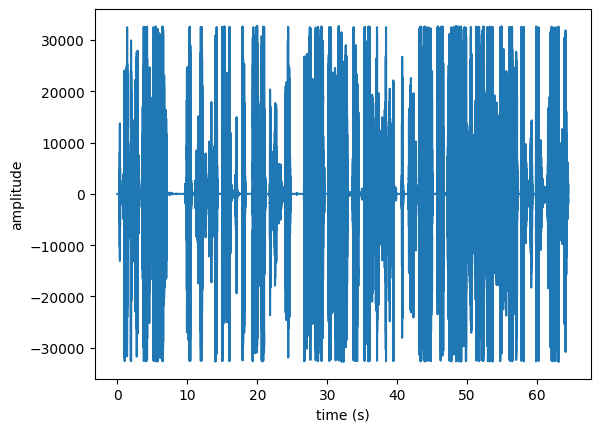

In [15]:
#파형그리기

import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt

import sounddevice as sd

# 오디오 파일 읽기
samplerate, data = sio.wavfile.read("C:/tevoice1.wav")

# 스테레오(이중)인 경우 하나의 채널 추출 (모노 채널로 가정)
if len(data.shape) == 2:
    data = data[:, 0]

# 시간 배열 생성
times = np.arange(len(data)) / float(samplerate)

# 파형 그래프 그리기
plt.plot(times, data)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [16]:
#파일 자르고 저장

start_time = 10 * 1000  # 시작 시간 (밀리초 단위)
end_time = 30 * 1000  # 종료 시간 (밀리초 단위)

# 오디오 자르기
segment = audio[start_time:end_time]

# 자른 오디오를 새 파일로 저장
segment.export("cutfile.wav", format="wav")


<_io.BufferedRandom name='cutfile.wav'>

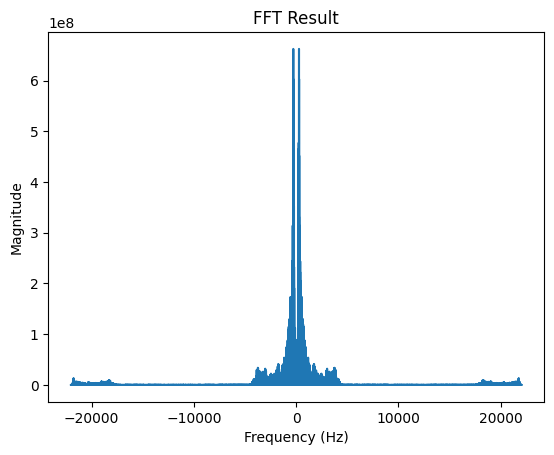

In [18]:
#푸리에변환

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import wave

# 오디오 파일 경로
audio_file = "C:/tevoice1.wav"

# 오디오 파일 열기
spf = wave.open(audio_file, 'r')

signal = spf.readframes(-1) #오디오 파일 raw 오디오 데이터를 읽어옴(-1 : 파일의 끝까지 모두 읽음)
signal = np.frombuffer(signal, dtype='int16') #이진 데이터를 int16 데이터 형식으로 NumPy 배열로 변환
fs = spf.getframerate() #오디오 파일의 샘플링 주파수 가져옴


fft_out = fft(signal) #FFT(고속푸리에변환) 수행, 주파수 영역에서의 오디오 데이터를 얻음
fft_mag = np.abs(fft_out) 
#FFT 결과에서 각 주파수 성분의 크기 (진폭)를 계산. 
#주파수 도메인에서 각 주파수 성분의 크기 알 수 있음


freq = np.fft.fftfreq(len(fft_out), 1.0 / fs) 
# FFT 결과의 주파수 축을 생성. fftfreq 함수를 사용해 주파수 값 계산

# Plot the FFT result
plt.figure(1) #번호 1 할당 한 그래프 생성
plt.title('FFT Result') #그래프 제목
plt.plot(freq, fft_mag) #주파수, 주파수 성분 크기(진폭) 플롯
plt.xlabel('Frequency (Hz)') #X축
plt.ylabel('Magnitude')#Y축
plt.show()


C:\Users\82105\AppData\Local\Temp\ipykernel_35908\2874395527.py:19: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(Sxx), aspect='auto', origin='lower', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])


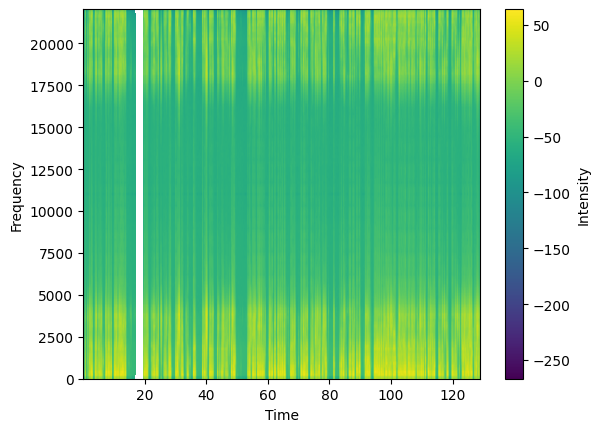

In [20]:
import matplotlib.pyplot as plt
from pydub import AudioSegment
import numpy as np
from scipy.signal import spectrogram


audio = AudioSegment.from_file("C:/tevoice1.wav", format="wav") #Pydub를 사용해 지정된 오디오 파일 로드


audio_data = np.array(audio.get_array_of_samples()) # Pydub의 get_array_of_samples 메서드 사용해 오디오 데이터 NumPy 배열로 변환


sample_rate = audio.frame_rate #오디오의 샘플 속도 가져와 sample_rate 변수에 저장


frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate)
#SciPy의 spectrogram 함수 사용해 스펙트로그램을 계산
#주어진 오디오 데이터, 샘플 속도 이용해 주파수, 시간 및 스펙트로그램 데이터를 반환


plt.imshow(10 * np.log10(Sxx), aspect='auto', origin='lower', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
# 스펙트로그램 데이터를 이미지로 표현하고, 로그 스케일 및 그래픽 옵션을 설정

plt.xlabel('Time') #X축
plt.ylabel('Frequency') #Y축
plt.colorbar().set_label('Intensity') # 컬러바를 추가, 컬러바의 레이블을 설정
plt.show()
